In [4]:
%matplotlib inline

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

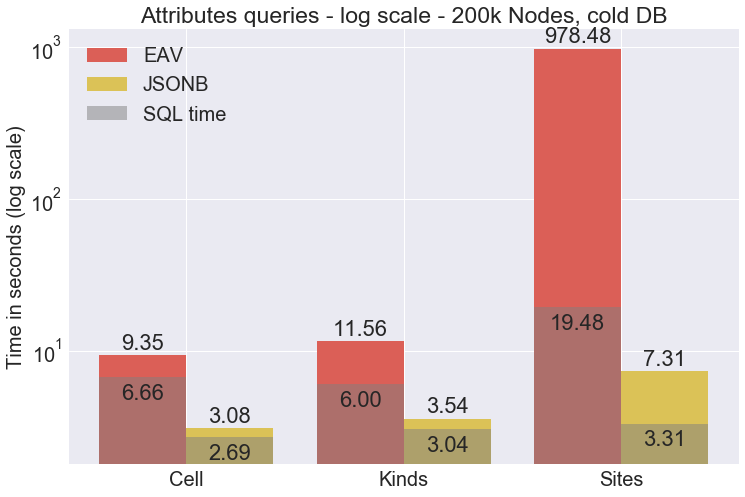

In [40]:
###############
# Benchmark #f1
###############

# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 200k nodes - part of group 20160222-225236 - Cold DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB without date time conversion (no GIN index)
# In these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario) - Measurements which are not used
# in this graph

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt

# Databases used (to be reviewed based on what is mentioned in the above txt files):
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_200_gin

axis_size = 20
val_size = 22
title_size = 23
legent_size = 20

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [9.35270285607, 11.56444215767, 978.4822318556]
eav_with_dt_sql = [6.663198, 6.003877, 19.47583]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [3.07630491257, 3.54275012016, 7.31332492828]
jsonb_no_gin_no_dt_sql = [2.694164, 3.037004, 3.310800]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.4       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects4 = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='gray', alpha=0.5)
rects4_sql = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='gray', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, cold DB', fontsize=title_size)
# ax.set_xticks(ind + 2 * width)
ax.set_xticks(ind + 0.5 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects4[0], rects1_sql[0]), (
    # Order of columns
    'EAV', 
    'JSONB',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")


def autolabel(rects, position=1):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        # High position (above the graph) - Low position (in the graph)        
        if position:
            ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height - 0.33 * height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)

autolabel(rects1, 1)
autolabel(rects1_sql, 0)
autolabel(rects4, 1)
autolabel(rects4_sql, 0)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_200_cold_eav_json_comparison.svg")

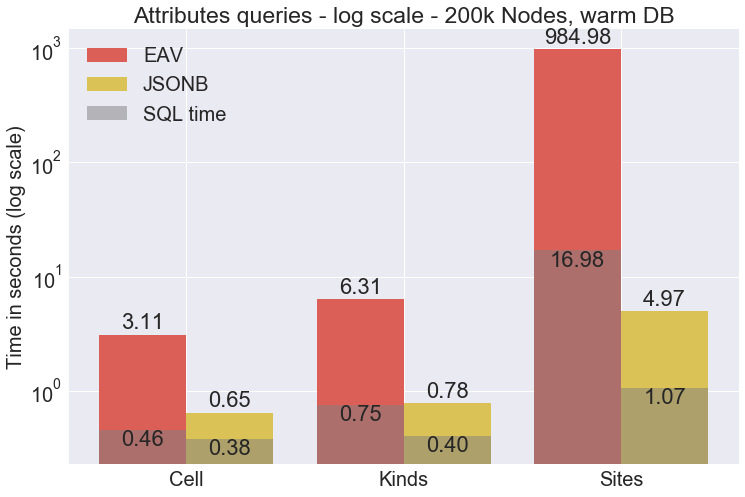

In [43]:
###############
# Benchmark #f2
###############

# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 200k nodes - part of group 20160222-225236 - Warm DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB with date time conversion and without (no GIN index)
# In these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario) - Measurements which are not used
# in this graph

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt

# Databases used (to be reviewed based on what is mentioned in the above txt files):
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_200_gin

axis_size = 20
val_size = 22
title_size = 23
legent_size = 20

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [3.11252713203, 6.31108617783, 984.9762549404]
eav_with_dt_sql = [0.455174, 0.753454, 16.977622]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [0.646707057953, 0.781686067581, 4.96505308151]
jsonb_no_gin_no_dt_sql = [0.381083, 0.402509, 1.069119]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.4       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects4 = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='gray', alpha=0.5)
rects4_sql = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='gray', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, warm DB', fontsize=title_size)
# ax.set_xticks(ind + 2 * width)
ax.set_xticks(ind + 0.5 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects4[0], rects1_sql[0]), (
    # Order of columns
    'EAV', 
    'JSONB',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")


def autolabel(rects, position=1):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        # High position (above the graph) - Low position (in the graph)        
        if position:
            ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height - 0.33 * height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)

autolabel(rects1, 1)
autolabel(rects1_sql, 0)
autolabel(rects4, 1)
autolabel(rects4_sql, 0)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_200_warm_eav_json_comparison.svg")

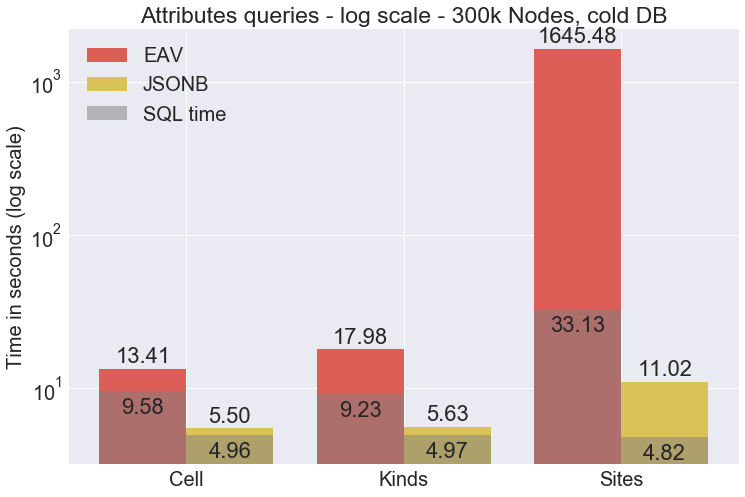

In [45]:
###############
# Benchmark #f3
###############

# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 300k nodes - part of group 20160222-225236 - Cold DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB without date time conversion (no GIN index)
# In these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario) - Measurements which are not used
# in this graph

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt

# Databases used (to be reviewed based on what is mentioned in the above txt files):
# - aiida_dj_jsonb_original_seb_copy_m37_copy_300_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_300_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_300_gin

axis_size = 20
val_size = 22
title_size = 23
legent_size = 20

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [13.40801000591, 17.9830842018, 1645.476661921]
eav_with_dt_sql = [9.581483, 9.230778, 33.131330]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [5.50369906425, 5.63258600235, 11.0162718296]
jsonb_no_gin_no_dt_sql = [4.958996, 4.970590, 4.823914]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.4       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects4 = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='gray', alpha=0.5)
rects4_sql = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='gray', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, cold DB', fontsize=title_size)
# ax.set_xticks(ind + 2 * width)
ax.set_xticks(ind + 0.5 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects4[0], rects1_sql[0]), (
    # Order of columns
    'EAV', 
    'JSONB',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")


def autolabel(rects, position=1):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        # High position (above the graph) - Low position (in the graph)        
        if position:
            ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height - 0.33 * height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)

autolabel(rects1, 1)
autolabel(rects1_sql, 0)
autolabel(rects4, 1)
autolabel(rects4_sql, 0)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_300_cold_eav_json_comparison.svg")

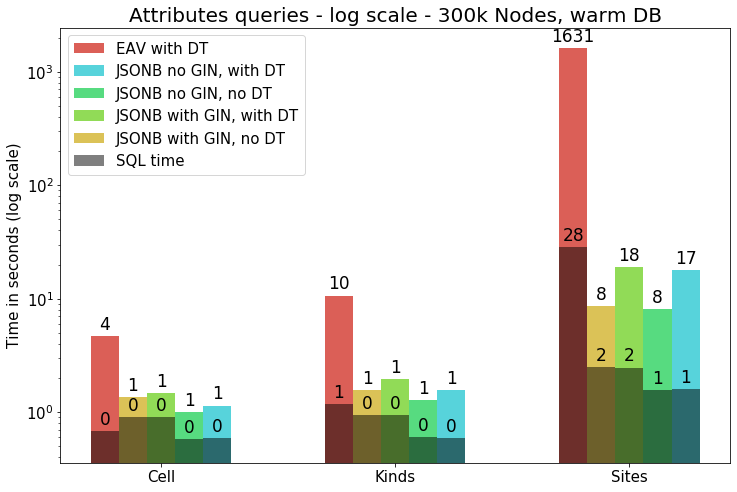

In [8]:
###############
# Benchmark #f4
###############

# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 300k nodes - part of group 20160222-225236 - Warm DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB without date time conversion (no GIN index)
# In these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario) - Measurements which are not used
# in this graph

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy_300_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_300_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_300_gin

axis_size = 20
val_size = 22
title_size = 23
legent_size = 20

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [4.710113049, 10.657492876, 1631.086276768]
eav_with_dt_sql = [0.682518, 1.182852, 28.609086]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [1.01057386398, 1.27383708954, 8.04718399048]
jsonb_no_gin_no_dt_sql = [0.580184, 0.601192, 1.576551]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.4       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects4 = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='gray', alpha=0.5)
rects4_sql = ax.bar(ind + 1 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='gray', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, warm DB', fontsize=title_size)
# ax.set_xticks(ind + 2 * width)
ax.set_xticks(ind + 0.5 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects4[0], rects1_sql[0]), (
    # Order of columns
    'EAV', 
    'JSONB',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")


def autolabel(rects, position=1):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        # High position (above the graph) - Low position (in the graph)        
        if position:
            ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height - 0.33 * height,
                    '%.2f' % (height),
                    ha='center', va='bottom', fontsize=val_size)

autolabel(rects1, 1)
autolabel(rects1_sql, 0)
autolabel(rects4, 1)
autolabel(rects4_sql, 0)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_300_warm_eav_json_comparison.svg")